## AS atated nbefore we can alsmost think of CApM as a linear regression 

In [15]:
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [4]:
##help(stats.linregress)

In [5]:
import pandas as pd 
from pandas_datareader import data as web

In [6]:
frame = pd.DataFrame()
frame = web.DataReader("SPY", data_source="yahoo", start = "2010-1-1")

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2560 entries, 2010-01-04 to 2020-03-05
Data columns (total 6 columns):
High         2560 non-null float64
Low          2560 non-null float64
Open         2560 non-null float64
Close        2560 non-null float64
Volume       2560 non-null float64
Adj Close    2560 non-null float64
dtypes: float64(6)
memory usage: 140.0 KB


In [9]:
frame.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2560.000000,2560.000000,2560.000000,2560.000000,2.560000e+03,2560.000000
mean,199.375617,197.423184,198.448027,198.476750,1.264117e+08,183.274568
std,60.774717,60.397074,60.599511,60.587059,7.506751e+07,66.061000
min,103.419998,101.129997,103.110001,102.199997,2.027000e+07,84.420135
25%,140.057503,138.692505,139.277496,139.424999,7.453480e+07,119.656523
50%,200.830002,198.664993,199.805000,199.754997,1.067554e+08,180.993156
75%,247.272503,245.964996,246.667496,246.832504,1.570232e+08,235.419506
max,339.079987,337.480011,337.790009,338.339996,7.178287e+08,338.339996


In [12]:
frame.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.788483
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.034081
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.099579
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,93.492622
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.803726


In [13]:
aapl = pd.DataFrame()
aapl = web.DataReader("AAPL", data_source="yahoo", start = "2010-1-1")

In [16]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753


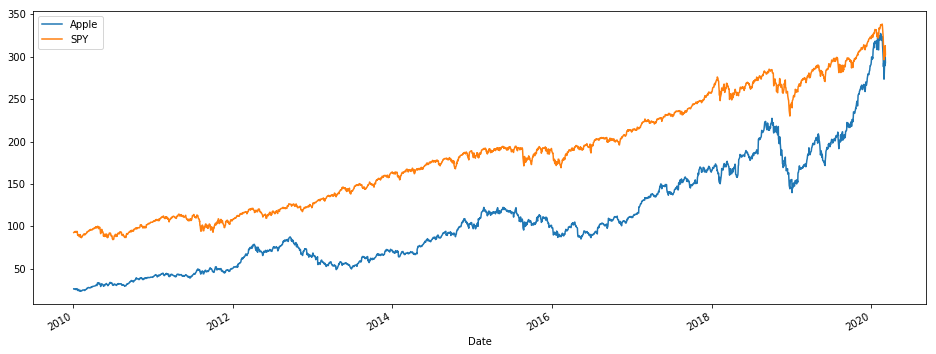

In [22]:
aapl["Adj Close"].plot(figsize = (16,6), label = "Apple")
frame["Adj Close"].plot(label = "SPY")
plt.legend()

### WE want to know the Alpha and BEta Values of both, we will need to get t he cumulative return for each stock

In [25]:
aapl["Cumulative"] = aapl["Adj Close"]/aapl["Adj Close"].iloc[0]
frame["Cumulative"] = frame["Adj Close"]/frame["Adj Close"].iloc[0]


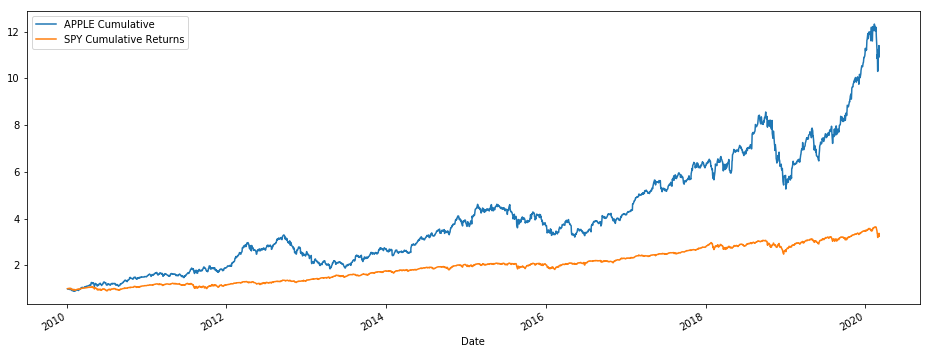

In [28]:
aapl["Cumulative"].plot(figsize = (16,6), label = "APPLE Cumulative ")
frame["Cumulative"].plot(label = "SPY Cumulative Returns")
plt.legend()

### LEts calculate the Daily Return for each


In [29]:
aapl["Daily Return"] = aapl["Adj Close"].pct_change()
frame["Daily Return"] = frame["Adj Close"].pct_change()

In [30]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Cumulative,Daily Return
Date,,,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483,1.000000,NaN
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366,1.001729,0.001729
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509,0.985795,-0.015906
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146,0.983973,-0.001849
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753,0.990515,0.006648


In [31]:
frame.head()

,High,Low,Open,Close,Volume,Adj Close,Cumulative,Daily Return
Date,,,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.788483,1.000000,NaN
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.034081,1.002647,0.002647
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.099579,1.003353,0.000704
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,93.492622,1.007589,0.004222
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.803726,1.010941,0.003328


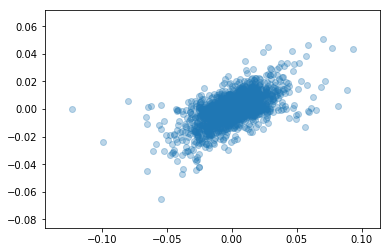

In [32]:
plt.scatter(aapl["Daily Return"], frame["Daily Return"], alpha=0.3)

In [35]:
beta, alpha, r_value, p_value,std_error = stats.linregress(aapl["Daily Return"].dropna(), frame["Daily Return"].dropna())

In [36]:
beta

0.34892619020697513

In [37]:
alpha

0.0001314847620191711

In [38]:
r_value

0.6093158586612218